In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib widget

In [66]:
plt.close('all')

In [67]:
#Define our units
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

In [68]:
#Define the radiating point source
def point_source(x=0,y=0,wavelength=500*nm, amplitude = 1):
    wavenumber = (2*np.pi / wavelength)
    return amplitude * np.exp(1j * wavenumber * np.sqrt(x**2 + y**2))

In [70]:
#Test our point source with a meshgrid

#Wavelength of interest
wavelength = 500*nm

#Plot 10 wavelengths each way
x_max = 10 * wavelength 
x_min = -x_max

y_max = x_max
y_min = x_min

yoffset = 0
xoffset = 0

resolution = 500 #Might need to adjust this
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
xx,yy = np.meshgrid(x,y)

#Run the point source with the meshgrid
z = point_source((xx-xoffset),(yy-yoffset),wavelength)

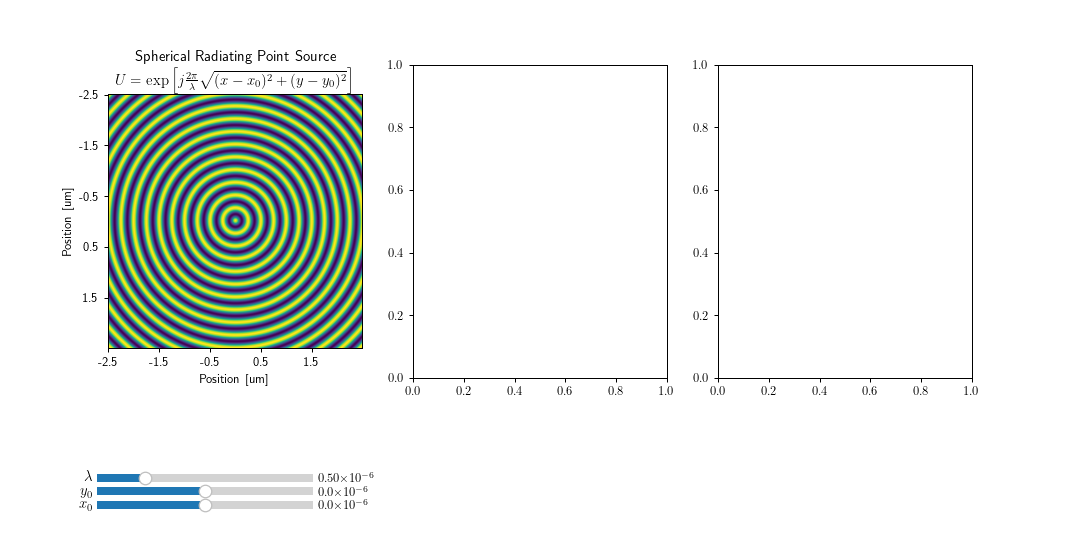

In [118]:
#Plot the things
'''
try:
    plt.style.use('science')
except:
    "Please install science plots"
finally:
    plt.style.use('ieee')
''' 
    
plt.rc('font', size=10)
plt.rcParams['text.usetex'] = True
#Define the figure
fig,ax = plt.subplots(1,3,figsize=(12,6), dpi=90)
#pos: f'{(x * 0.5):.0f}
formatter = lambda x, pos: f'{(x * 0.01) - 2.5:.1f}'
ax[0].xaxis.set_major_formatter(formatter)
ax[0].yaxis.set_major_formatter(formatter)

#ax.set_xlim([x_min/um, x_max/um])
#ax.set_ylim([y_min/um, y_max/um])
ax[0].set_title("Spherical Radiating Point Source\n"\
            r"$U = \exp{\left[j\frac{2\pi}{\lambda}\sqrt{(x-x_0)^2 + (y-y_0)^2}\right]}$", fontsize=12
)
ax[0].set_xlabel("Position [um]") #The units are hard coded - need a function to determine them
ax[0].set_ylabel("Position [um]")

#Set intial plot
im0 = ax[0].imshow(np.real(z))

#Make room for sliders
fig.subplots_adjust(left= 0.1,bottom = 0.3)

#Define some sliders
wavelength_slider_ax = fig.add_axes([0.09, 0.1, 0.2, 0.03])
wavelength_slider = Slider(wavelength_slider_ax, r'$\lambda$', 200*nm, 1550*nm, valinit=wavelength)
wavelength_slider.label.set_size(12)

yoffset_slider_ax = fig.add_axes([0.09, 0.075, 0.2, 0.03])
yoffset_slider = Slider(yoffset_slider_ax, r"$y_0$", -2.5*um, 2.5*um, valinit=yoffset)
yoffset_slider.label.set_size(12)

xoffset_slider_ax = fig.add_axes([0.09, 0.05, 0.2, 0.03])
xoffset_slider = Slider(xoffset_slider_ax, r"$x_0$", -2.5*um, 2.5*um, valinit=yoffset)
xoffset_slider.label.set_size(12)

def sliders_on_changed(val):
    im0.set_data(np.real(point_source((xx-xoffset_slider.val),(yy-yoffset_slider.val),wavelength_slider.val)))
    fig.canvas.draw_idle()
    
wavelength_slider.on_changed(sliders_on_changed)
yoffset_slider.on_changed(sliders_on_changed)
xoffset_slider.on_changed(sliders_on_changed)



plt.show()